## Influenza Spread Analysis - Solution

In [3]:
# Import packages needed to perform the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# define the file names
flu = 'data/flu_pneumonia.csv'
temp = 'data/avg_winter_temperature.csv'

### Step 1.	Load both datasets and merge them

In [5]:
# load the data
df_flu = pd.read_csv(flu)
df_temp = pd.read_csv(temp)

In [6]:
# explore a little bit the flu dataframe
df_flu.head()

,state,death_rate,death_abs
0,AK,8.4,41
1,AL,19.5,1097
2,AR,20.0,700
3,AZ,9.5,775
4,CA,14.8,6188


In [7]:
# see the types of variables
df_flu.dtypes

state          object
death_rate    float64
death_abs       int64
dtype: object

In [8]:
# explore a little bit the temperature dataframe
df_temp.head()

,state,avg_celsius
0,AK,-16.3
1,AL,8.1
2,AR,5.3
3,AZ,6.4
4,CA,7.9


In [9]:
# see the types of variables
df_temp.dtypes

state           object
avg_celsius    float64
dtype: object

In [10]:
# merge the dataframes
df = pd.merge(df_flu, df_temp, on='state')

In [11]:
# explore the new dataframe
df.head()

,state,death_rate,death_abs,avg_celsius
0,AK,8.4,41,-16.3
1,AL,19.5,1097,8.1
2,AR,20.0,700,5.3
3,AZ,9.5,775,6.4
4,CA,14.8,6188,7.9


### Step 2.	Create a function that receives a temperature in Celsius and converts it to Fahrenheit

In [12]:
# create a function to  convert celsius to fahrenheit
def convert_celsius_to_fahrenheit(temp):
    return temp*1.8 + 32

In [13]:
# test function simulating a call
print(convert_celsius_to_fahrenheit(20))

68.0


### Step 3.	Create a function that receives a temperature in Fahrenheit and converts it to Celsius. Make both transformations in the same function, receiving as additional argument the type of conversion you want to perform

In [15]:
# create a function to  convert fahrenheit to celsius
def convert_fahrenheit_to_celsius(temp):
    return (temp - 32)/1.8

In [16]:
# test function simulating a call
print(convert_fahrenheit_to_celsius(68))

20.0


In [17]:
# create a function to convert both
def convert_temperature(temp, unit):
    if unit == 'F':
        return (temp - 32)/1.8
    elif unit == 'C':
        return (temp*1.8 + 32)
    else:
        return ('error')

In [18]:
# test function simulating a call
print(convert_temperature(20, 'C'))

68.0


In [19]:
# test function simulating a call
print(convert_temperature(68, 'F'))

20.0


In [20]:
# test function simulating a call
print(convert_temperature(20, 'Celsius'))

error


### Step 4.	Apply the conversion to your data frame, representing the temperature in Fahrenheit

In [21]:
# add a new column
df['avg_fahrenheit'] = np.nan

In [24]:
# calculate the conversion to every row
for i in range(len(df)):
    #df.avg_fahrenheit[i] = convert_temperature(df.avg_celsius[i], 'C')
    df.loc[i, 'avg_fahrenheit'] = convert_temperature(df.avg_celsius[i], 'C')

In [25]:
# explore the results
df.head()

,state,death_rate,death_abs,avg_celsius,avg_fahrenheit
0,AK,8.4,41,-16.3,2.66
1,AL,19.5,1097,8.1,46.58
2,AR,20.0,700,5.3,41.54
3,AZ,9.5,775,6.4,43.52
4,CA,14.8,6188,7.9,46.22


In [26]:
# remove the column in celsius
df.drop('avg_celsius', 1, inplace=True)

In [27]:
df.head()

,state,death_rate,death_abs,avg_fahrenheit
0,AK,8.4,41,2.66
1,AL,19.5,1097,46.58
2,AR,20.0,700,41.54
3,AZ,9.5,775,43.52
4,CA,14.8,6188,46.22


### Step 5.	Calculate the Pearson's correlation coefficient to determine if the number of deaths associated with influenza and the average temperature are correlated. Do the same thing to the death rate, instead of absolute numbers

In [28]:
# correlation between temperature and death rate, resulting a matrix
np.corrcoef(df.avg_fahrenheit, df.death_rate)

array([[1.        , 0.30437027],
       [0.30437027, 1.        ]])

In [29]:
# correlation between temperature and death rate, resulting a single value
np.corrcoef(df.avg_fahrenheit, df.death_rate)[0, 1]

0.30437026828296365

In [30]:
# correlation between temperature and death absolute, resulting a single value
np.corrcoef(df.avg_fahrenheit, df.death_abs)[0, 1]

0.28406611130051046

### Step 6.	Create a function that receives the correlation coefficient calculated earlier and interprets its results

In [31]:
# create a function to interpret the results
def interpret_corrcoef(value):
    if (value == -1):
        print ('perfect negative')
    elif (value > -1 and value <=-0.7):
        print ('strong negative')
    elif (value > -0.7 and value <=-0.5):
        print ('moderate negative')
    elif (value > -0.5 and value <=-0.3):
        print ('weak negative')
    elif (value > -0.3 and value <=0.3):
        print ('no relationship')
    elif (value > 0.3 and value <=0.5):
        print ('weak positive')
    elif (value > 0.5 and value <=0.7):
        print ('moderate positive')
    elif (value > 0.7 and value <1):
        print ('strong positive')
    elif (value == 1):
        print ('perfect positive')
    else:
        print ('error')

In [32]:
# test some cases
interpret_corrcoef(0.9)
interpret_corrcoef(-0.1)

strong positive
no relationship


In [33]:
# use the function to interpret the results of our correlation coeficients
interpret_corrcoef(np.corrcoef(df.avg_fahrenheit, df.death_rate)[0, 1])
interpret_corrcoef(np.corrcoef(df.avg_fahrenheit, df.death_abs)[0, 1])

weak positive
no relationship


### Step 7.	Graph the relationship between number deaths associated with influenza and average temperature using a scatter plot. Do the same thing to the death rate, instead of absolute numbers

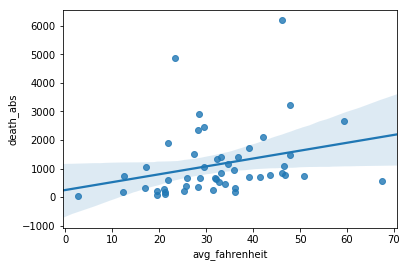

In [34]:
sns.regplot(x='avg_fahrenheit', y="death_abs", data=df)

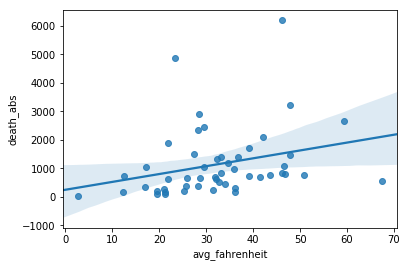

In [35]:
sns.regplot(x='avg_fahrenheit', y="death_abs", data=df)